In [13]:
# Basic Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X = df.drop(columns=['math score'],axis=1)

In [8]:
y = df['math score']

In [9]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K Nearest Neighbors" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "Cat Boosting" : CatBoostRegressor(verbose=False),
    "Ada Boost Regressor" : AdaBoostRegressor() 
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train)
    
    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test Dataset
    trn_mae, trn_rmse, trn_r2_square = evaluate_model(Y_train, y_train_pred)
    tst_mae, tst_rmse, tst_r2_square = evaluate_model(Y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training Set")
    print("- Root Mean Square Error: {:4f}".format(trn_rmse))
    print("- Mean Absolute Error: {:.4f}".format(trn_mae))
    print("- R2 Square: {:.4f}".format(trn_r2_square))
    print('\n')
    print("Model Performance for Testing Set")
    print("- Root Mean Square Error: {:4f}".format(tst_rmse))
    print("- Mean Absolute Error: {:.4f}".format(tst_mae))
    print("- R2 Square: {:.4f}".format(tst_r2_square))
    r2_list.append(tst_r2_square)
    
    print('=='*35)
    print('\n')

Linear Regression
Model Performance for Training Set
- Root Mean Square Error: 5.324346
- Mean Absolute Error: 4.2671
- R2 Square: 0.8743


Model Performance for Testing Set
- Root Mean Square Error: 5.395987
- Mean Absolute Error: 4.2158
- R2 Square: 0.8803


Lasso
Model Performance for Training Set
- Root Mean Square Error: 6.593816
- Mean Absolute Error: 5.2063
- R2 Square: 0.8071


Model Performance for Testing Set
- Root Mean Square Error: 6.519695
- Mean Absolute Error: 5.1579
- R2 Square: 0.8253


Ridge
Model Performance for Training Set
- Root Mean Square Error: 5.323325
- Mean Absolute Error: 4.2650
- R2 Square: 0.8743


Model Performance for Testing Set
- Root Mean Square Error: 5.390387
- Mean Absolute Error: 4.2111
- R2 Square: 0.8806


K Nearest Neighbors
Model Performance for Training Set
- Root Mean Square Error: 5.707683
- Mean Absolute Error: 4.5167
- R2 Square: 0.8555


Model Performance for Testing Set
- Root Mean Square Error: 7.253041
- Mean Absolute Error: 5.6210


In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.854575
7,Cat Boosting,0.851632
8,Ada Boost Regressor,0.850485
6,XGB Regressor,0.827797
1,Lasso,0.825320
3,K Nearest Neighbors,0.783813
4,Decision Tree Regressor,0.749341


In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print("Accuracy of the model is %.2f%%"%score)

Accuracy of the model is 88.03%


Text(0, 0.5, 'Predicred')

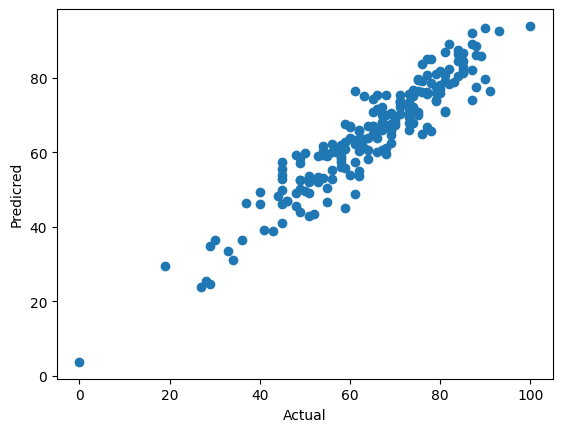

In [23]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicred')

In [24]:
pred_df = pd.DataFrame({'Actual Value':Y_test, 'Predicted Value': y_pred, 'Difference': Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
